In [2]:
# Install Ultralytics library
!pip install ultralytics

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
   ---------------------------------------- 0.0/978.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/978.8 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/978.8 kB ? eta -:--:--
   -------------------- ----------------- 524.3/978.8 kB 882.6 kB/s eta 0:00:01
   -------------------- ----------------- 524.3/978.8 kB 882.6 kB/s eta 0:00:01
   ------------------------------ ------- 786.4/978.8 kB 931.2 kB/s eta 0:00:01
   -------------------------------------- 978.8/978.8 kB 791.0 kB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
syft 0.9.2 requires matplotlib<3.9.1,>=3.7.1, but you have matplotlib 3.10.0 which is incompatible.
syft 0.9.2 requires numpy<=1.24.4,>=1.23.5; python_version < "3.12", but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video
%matplotlib inline


In [2]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

<img src="https://github.com/FarzadNekouee/YOLOv8_Traffic_Density_Estimation/blob/master/images/YOLOv8_object_detection_models.jpg?raw=true" width="2400">

In [4]:
model = YOLO('yolov8n.pt')

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">The pre-trained model we've loaded is trained on the COCO dataset, which includes the 'car' and 'truck' classes among its 80 different categories — exactly what we need for our project. Now, let's put our model to the test and see how it performs on a sample image:</p>
</div>


image 1/1 d:\Major\Vehicle_Detection_Image_Dataset\sample_image.jpg: 384x640 5 cars, 254.0ms
Speed: 16.7ms preprocess, 254.0ms inference, 19.5ms postprocess per image at shape (1, 3, 384, 640)


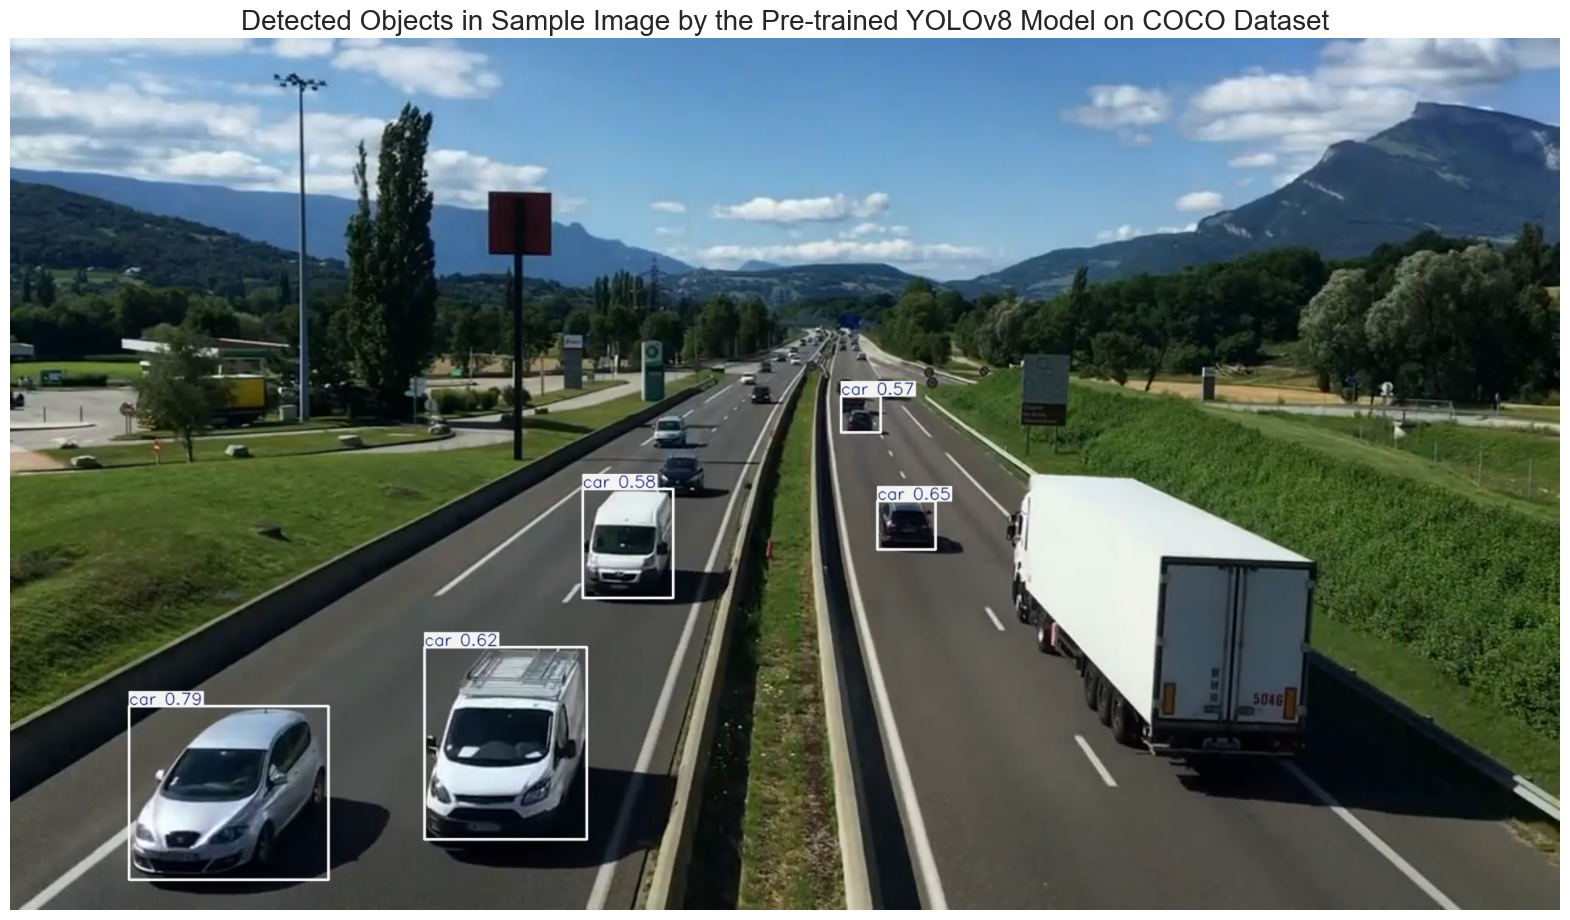

In [5]:

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

image_path = './Vehicle_Detection_Image_Dataset/sample_image.jpg'

results = model.predict(source=image_path, 
                        imgsz=640,  
                        conf=0.5)   

sample_image = results[0].plot(line_width=2)

sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Pre-trained YOLOv8 Model on COCO Dataset', fontsize=20)
plt.axis('off')
plt.show()

In [6]:

dataset_path = 'Vehicle_Detection_Image_Dataset'
yaml_file_path = './Vehicle_Detection_Image_Dataset/data.yaml'

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- Vehicle
nc: 1
roboflow:
  license: CC BY 4.0
  project: vehicle_detection_yolov8
  url: https://universe.roboflow.com/farzad/vehicle_detection_yolov8/dataset/3
  version: 3
  workspace: farzad
train: D:\Major\Vehicle_Detection_Image_Dataset\train
val: D:\Major\Vehicle_Detection_Image_Dataset\valid



In [7]:
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

num_train_images = 0
num_valid_images = 0

train_image_sizes = set()
valid_image_sizes = set()

for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):  
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'): 
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 536
Number of validation images: 90
All training images have the same size: (640, 640)
All validation images have the same size: (640, 640)


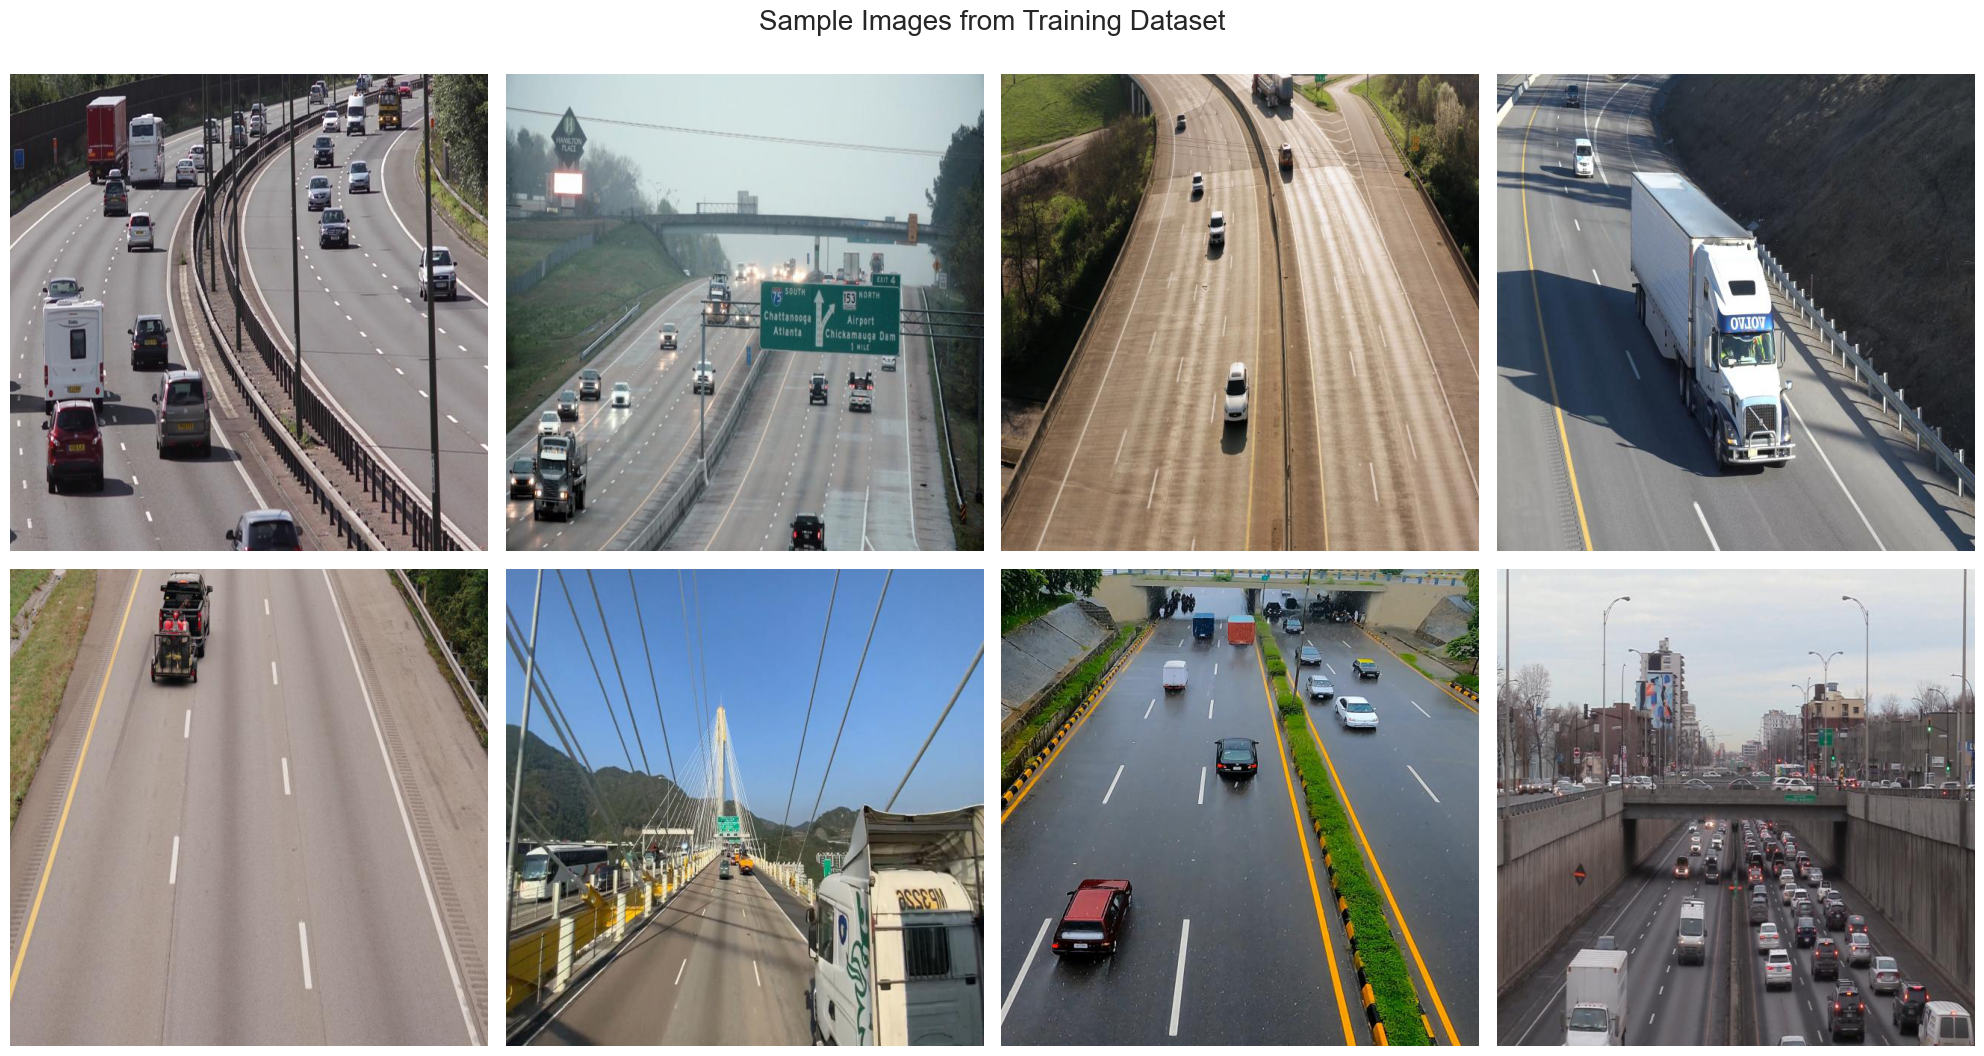

In [ ]:
image_files = [file for file in os.listdir(train_images_path) if file.endswith('.jpg')]
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 8)]

fig, axes = plt.subplots(2, 4, figsize=(20, 11))

for ax, img_file in zip(axes.ravel(), selected_images):
    img_path = os.path.join(train_images_path, img_file)
    image = Image.open(img_path)
    ax.imshow(image)
    ax.axis('off')  

plt.suptitle('Sample Images from Training Dataset', fontsize=20)
plt.tight_layout()
plt.show()

In [8]:
results = model.train(
    data=yaml_file_path,     
    epochs=10,             
    imgsz=640,               
    device=0,                
    patience=50,             
    batch=32,            
    optimizer='auto',      
    lr0=0.0001,             
    lrf=0.1,                
    dropout=0.1,          
    seed=0                   
)

New https://pypi.org/project/ultralytics/8.3.110 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.58  Python-3.10.13 torch-2.5.1+cpu 


ValueError: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: None
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


In [2]:
post_training_files_path = './detect/train3'


In [ ]:
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [3]:
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

df = pd.read_csv(results_csv_path)

df.columns = df.columns.str.strip()

plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

NameError: name 'post_training_files_path' is not defined

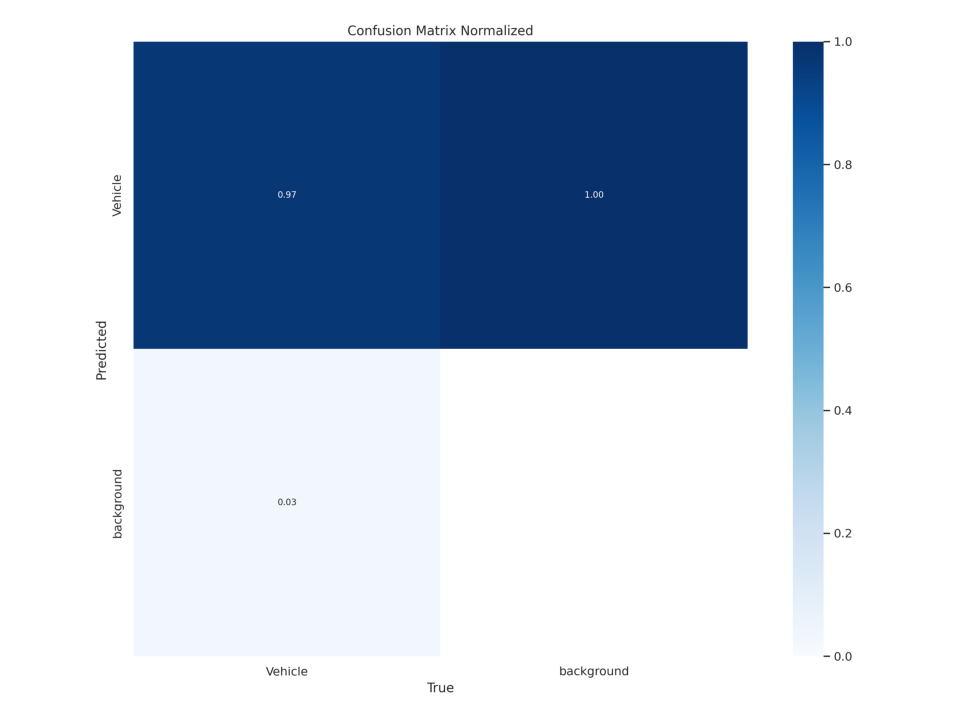

In [6]:
confusion_matrix_path = os.path.join(post_training_files_path, 'confusion_matrix_normalized.png')
cm_img = cv2.imread(confusion_matrix_path)
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off') 
plt.show()

In [3]:
import os
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')
data_yaml_path = r'D:/Major/Vehicle_Detection_Image_Dataset/data.yaml'
best_model = YOLO(best_model_path)
metrics = best_model.val(data=data_yaml_path,split='val')

Ultralytics 8.3.111  Python-3.11.7 torch-2.5.1+cpu CPU (Intel Core(TM) i5-10210U 1.60GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.20.0 ms, read: 29.230.8 MB/s, size: 63.3 KB)


val: Scanning D:\Major\Vehicle_Detection_Image_Dataset\valid\labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.01s/it]


                   all         90        937      0.922      0.937      0.975      0.741
Speed: 7.1ms preprocess, 194.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to c:\Users\HAI\runs\detect\val9


In [24]:
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])
metrics_df.round(3)

Metric Value
metrics/precision(B)         0.922
metrics/recall(B)            0.937
metrics/mAP50(B)             0.975
metrics/mAP50-95(B)          0.741
fitness                      0.765

In [7]:
valid_images_path = os.path.join(dataset_path, 'valid', 'images')
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 9)]
fig, axes = plt.subplots(3, 3, figsize=(20, 21))
fig.suptitle('Validation Set Inferences', fontsize=24)
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(valid_images_path, selected_images[i])
    results = best_model.predict(source=image_path, imgsz=640, conf=0.5)
    annotated_image = results[0].plot(line_width=1)
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()

NameError: name 'dataset_path' is not defined

In [11]:
sample_image_path = './Vehicle_Detection_Image_Dataset/sample_image.jpg'
results = best_model.predict(source=sample_image_path, imgsz=640, conf=0.7) 
                        
sample_image = results[0].plot(line_width=2)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Fine-tuned YOLOv8 Model', fontsize=20)
plt.axis('off')
plt.show()

NameError: name 'best_model' is not defined

In [12]:
dataset_video_path = './Vehicle_Detection_Image_Dataset/sample_video.mp4'
video_path = './sample_video.mp4'
shutil.copyfile(dataset_video_path, video_path)
best_model.predict(source=video_path, save=True)

NameError: name 'best_model' is not defined

In [13]:
!ffmpeg -y -loglevel panic -i /runs/detect/predict/sample_video.avi processed_sample_video.mp4
Video("processed_sample_video.mp4", embed=True, width=960)

'ffmpeg' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
import numpy as np
import cv2
heavy_traffic_threshold = 10
vertices1 = np.array([(465, 350), (609, 350), (510, 630), (2, 630)], dtype=np.int32)
vertices2 = np.array([(678, 350), (815, 350), (1203, 630), (743, 630)], dtype=np.int32)

x1, x2 = 325, 635 
lane_threshold = 609
text_position_left_lane = (10, 50)
text_position_right_lane = (820, 50)
intensity_position_left_lane = (10, 100)
intensity_position_right_lane = (820, 100)

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (255, 255, 255)  
background_color = (0, 0, 255)  
        
cap = cv2.VideoCapture('./sample_video.mp4')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('traffic_density_analysis.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        
        detection_frame = frame.copy()

        detection_frame[:x1, :] = 0 
        detection_frame[x2:, :] = 0  
        results = best_model.predict(detection_frame, imgsz=640, conf=0.4)
        processed_frame = results[0].plot(line_width=1)

        processed_frame[:x1, :] = frame[:x1, :].copy()
        processed_frame[x2:, :] = frame[x2:, :].copy()        
        cv2.polylines(processed_frame, [vertices1], isClosed=True, color=(0, 255, 0), thickness=2)
        cv2.polylines(processed_frame, [vertices2], isClosed=True, color=(255, 0, 0), thickness=2)

        bounding_boxes = results[0].boxes
        vehicles_in_left_lane = 0
        vehicles_in_right_lane = 0
        for box in bounding_boxes.xyxy:
            if box[0] < lane_threshold:
                vehicles_in_left_lane += 1
            else:
                vehicles_in_right_lane += 1
        traffic_intensity_left = "Heavy" if vehicles_in_left_lane > heavy_traffic_threshold else "Smooth"
        traffic_intensity_right = "Heavy" if vehicles_in_right_lane > heavy_traffic_threshold else "Smooth"
        cv2.rectangle(processed_frame, (text_position_left_lane[0]-10, text_position_left_lane[1] - 25), 
                      (text_position_left_lane[0] + 460, text_position_left_lane[1] + 10), background_color, -1)
        cv2.putText(processed_frame, f'Vehicles in Left Lane: {vehicles_in_left_lane}', text_position_left_lane, 
                    font, font_scale, font_color, 2, cv2.LINE_AA)
        cv2.rectangle(processed_frame, (intensity_position_left_lane[0]-10, intensity_position_left_lane[1] - 25), 
                      (intensity_position_left_lane[0] + 460, intensity_position_left_lane[1] + 10), background_color, -1)

        cv2.putText(processed_frame, f'Traffic Intensity: {traffic_intensity_left}', intensity_position_left_lane, 
                    font, font_scale, font_color, 2, cv2.LINE_AA)
        cv2.rectangle(processed_frame, (text_position_right_lane[0]-10, text_position_right_lane[1] - 25), 
                      (text_position_right_lane[0] + 460, text_position_right_lane[1] + 10), background_color, -1)
        cv2.putText(processed_frame, f'Vehicles in Right Lane: {vehicles_in_right_lane}', text_position_right_lane, 
                    font, font_scale, font_color, 2, cv2.LINE_AA)
        cv2.rectangle(processed_frame, (intensity_position_right_lane[0]-10, intensity_position_right_lane[1] - 25), 
                      (intensity_position_right_lane[0] + 460, intensity_position_right_lane[1] + 10), background_color, -1)
        cv2.putText(processed_frame, f'Traffic Intensity: {traffic_intensity_right}', intensity_position_right_lane, 
                    font, font_scale, font_color, 2, cv2.LINE_AA)
        out.write(processed_frame)
        
        # cv2.imshow('Real-time Analysis', processed_frame)
        # if cv2.waitKey(1) & 0xFF == ord('q'):  # Press Q on keyboard to exit the loop
        #     break
    else:
        break

cap.release()
out.release()

NameError: name 'best_model' is not defined

In [2]:
!ffmpeg -y -loglevel panic -i /kaggle/working/traffic_density_analysis.avi traffic_density_analysis.mp4
Video("traffic_density_analysis.mp4", embed=True, width=960)

'ffmpeg' is not recognized as an internal or external command,
operable program or batch file.


NameError: name 'Video' is not defined

In [ ]:
best_model.export(format='onnx')

In [ ]:
import cv2

model = YOLO("yolov8n.pt")

video_path = "./sample_video.mp4"
cap = cv2.VideoCapture(video_path)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

out = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    annotated_frame = results[0].plot()

    cv2.imshow("Traffic Analysis", annotated_frame)
    out.write(annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()
model.predict(source=0, show=True)  



0: 384x640 1 car, 132.1ms
Speed: 7.6ms preprocess, 132.1ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 169.8ms
Speed: 97.0ms preprocess, 169.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 249.8ms
Speed: 3.9ms preprocess, 249.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 123.6ms
Speed: 8.2ms preprocess, 123.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 121.1ms
Speed: 3.0ms preprocess, 121.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 183.2ms
Speed: 7.0ms preprocess, 183.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 128.1ms
Speed: 3.0ms preprocess, 128.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 125.7ms
Speed: 5.0ms preprocess, 125.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 

In [ ]:
import cv2
import numpy as np
import os
import pandas as pd
from ultralytics import YOLO
from collections import defaultdict
from math import sqrt

# ---------------------
# CONFIG
# ---------------------
video_folder = "./Vehicle_Detection_Image_Dataset/videos"
output_folder = "./outputs"
model = YOLO("yolov8n.pt")
frame_skip = 1  # process every frame, or increase for performance
pixel_to_meter_ratio = 0.05  # approx (you must calibrate properly)

# ---------------------
# Track vehicle positions and speeds
# ---------------------
vehicle_tracks = {}
vehicle_speeds = defaultdict(list)
next_vehicle_id = 1

def calculate_speed(p1, p2, fps):
    px_distance = sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)
    speed_mps = (px_distance * fps) * pixel_to_meter_ratio
    speed_kmph = speed_mps * 3.6
    return round(speed_kmph, 2)

def match_vehicles(current_centers, fps, frame_id):
    global next_vehicle_id
    matched_ids = []

    for cx, cy in current_centers:
        min_dist = float('inf')
        matched_id = None

        for vid, points in vehicle_tracks.items():
            if len(points) < 1:
                continue
            px, py, pf = points[-1]
            dist = sqrt((cx - px) ** 2 + (cy - py) ** 2)
            if dist < 50 and vid not in matched_ids:
                matched_id = vid
                break

        if matched_id is None:
            matched_id = next_vehicle_id
            next_vehicle_id += 1

        matched_ids.append(matched_id)
        vehicle_tracks.setdefault(matched_id, []).append((cx, cy, frame_id))

        if len(vehicle_tracks[matched_id]) >= 2:
            p1 = vehicle_tracks[matched_id][-2]
            p2 = vehicle_tracks[matched_id][-1]
            speed = calculate_speed(p1, p2, fps)
            vehicle_speeds[matched_id].append(speed)

def process_video(video_path):
    global vehicle_tracks, vehicle_speeds, next_vehicle_id
    vehicle_tracks = {}
    vehicle_speeds = defaultdict(list)
    next_vehicle_id = 1

    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    base_filename = os.path.splitext(os.path.basename(video_path))[0]
    output_csv = os.path.join(output_folder, f"{base_filename}_analysis.csv")

    frame_id = 0
    vehicle_log = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_id += 1
        if frame_id % frame_skip != 0:
            continue

        results = model(frame, conf=0.4)[0]
        boxes = results.boxes.xyxy.cpu().numpy()

        centers = []
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            cx, cy = int((x1 + x2) / 2), int((y1 + y2) / 2)
            centers.append((cx, cy))

        match_vehicles(centers, fps, frame_id)

    # Save results
    for vid in vehicle_tracks:
        avg_speed = round(np.mean(vehicle_speeds[vid]), 2) if vehicle_speeds[vid] else 0
        vehicle_log.append({
            "vehicle_id": vid,
            "average_speed_kmph": avg_speed,
            "total_frames_seen": len(vehicle_tracks[vid])
        })

    df = pd.DataFrame(vehicle_log)
    os.makedirs(output_folder, exist_ok=True)
    df.to_csv(output_csv, index=False)
    cap.release()
    print(f"[✅] Processed {video_path} → Saved to {output_csv}")

# ---------------------
# Batch Process All Videos
# ---------------------
for filename in os.listdir(video_folder):
    if filename.endswith(".mp4") or filename.endswith(".avi"):
        process_video(os.path.join(video_folder, filename))



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\HAI\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\HAI\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\HAI\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\HAI\anaconda3\Lib\site-packages\torn

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\HAI\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\HAI\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\HAI\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\HAI\anaconda3\Lib\site-packages\torn

AttributeError: _ARRAY_API not found

ModuleNotFoundError: No module named 'ultralytics'

In [7]:
import cv2
import numpy as np
from ultralytics import YOLO
from math import sqrt
from collections import defaultdict

# Load model
model = YOLO("yolov8n.pt")

# Video paths
video_path = "./sample_video.mp4"
cap = cv2.VideoCapture(video_path)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

out = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# Tracking data
vehicle_tracks = {}
vehicle_speeds = defaultdict(list)
next_vehicle_id = 1
pixel_to_meter_ratio = 0.05  # Approximate, tune for better real-world results
frame_id = 0

def calculate_speed(p1, p2, fps):
    dist_px = sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
    speed_mps = dist_px * fps * pixel_to_meter_ratio
    return round(speed_mps * 3.6, 2)

def match_vehicles(centers):
    global next_vehicle_id
    assigned = {}
    for (cx, cy) in centers:
        best_match = None
        min_dist = float('inf')
        for vid, track in vehicle_tracks.items():
            if len(track) > 0:
                last_x, last_y, _ = track[-1]
                dist = sqrt((cx - last_x)**2 + (cy - last_y)**2)
                if dist < 50:
                    if dist < min_dist:
                        min_dist = dist
                        best_match = vid
        if best_match is None:
            best_match = next_vehicle_id
            next_vehicle_id += 1
        vehicle_tracks.setdefault(best_match, []).append((cx, cy, frame_id))
        assigned[(cx, cy)] = best_match
    return assigned

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_id += 1

    results = model(frame)[0]
    boxes = results.boxes.xyxy.cpu().numpy()
    centers = []

    for box in boxes:
        x1, y1, x2, y2 = map(int, box[:4])
        cx, cy = int((x1 + x2) / 2), int((y1 + y2) / 2)
        centers.append((cx, cy))

    matched = match_vehicles(centers)

    annotated_frame = results.plot()

    for (cx, cy), vid in matched.items():
        if len(vehicle_tracks[vid]) >= 2:
            p1 = vehicle_tracks[vid][-2]
            p2 = vehicle_tracks[vid][-1]
            speed = calculate_speed(p1, p2, fps)
            vehicle_speeds[vid].append(speed)
            avg_speed = round(np.mean(vehicle_speeds[vid]), 2)
        else:
            avg_speed = 0.0

        cv2.circle(annotated_frame, (cx, cy), 5, (0, 255, 255), -1)
        cv2.putText(annotated_frame, f"ID:{vid} | {avg_speed} km/h", (cx + 10, cy - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    cv2.imshow("Traffic Analysis", annotated_frame)
    out.write(annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()



0: 384x640 1 car, 302.5ms
Speed: 91.2ms preprocess, 302.5ms inference, 22.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 236.1ms
Speed: 18.6ms preprocess, 236.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 180.9ms
Speed: 4.4ms preprocess, 180.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 200.9ms
Speed: 3.9ms preprocess, 200.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 195.7ms
Speed: 4.5ms preprocess, 195.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 173.3ms
Speed: 4.2ms preprocess, 173.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 187.2ms
Speed: 3.7ms preprocess, 187.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 148.8ms
Speed: 4.0ms preprocess, 148.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384

In [1]:
heavy_traffic_threshold = 10

# Define the vertices for the quadrilaterals
vertices1 = np.array([(465, 350), (609, 350), (510, 630), (2, 630)], dtype=np.int32)
vertices2 = np.array([(678, 350), (815, 350), (1203, 630), (743, 630)], dtype=np.int32)

# Define the vertical range for the slice and lane threshold
x1, x2 = 325, 635 
lane_threshold = 609

# Define the positions for the text annotations on the image
text_position_left_lane = (10, 50)
text_position_right_lane = (820, 50)
intensity_position_left_lane = (10, 100)
intensity_position_right_lane = (820, 100)

# Define font, scale, and colors for the annotations
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (255, 255, 255)    # White color for text
background_color = (0, 0, 255)  # Red background for text
        
# Open the video
cap = cv2.VideoCapture('sample_video.mp4')

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('traffic_density_analysis.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        # Create a copy of the original frame to modify
        detection_frame = frame.copy()
    
        # Black out the regions outside the specified vertical range
        detection_frame[:x1, :] = 0  # Black out from top to x1
        detection_frame[x2:, :] = 0  # Black out from x2 to the bottom of the frame
        
        # Perform inference on the modified frame
        results = best_model.predict(detection_frame, imgsz=640, conf=0.4)
        processed_frame = results[0].plot(line_width=1)
        
        # Restore the original top and bottom parts of the frame
        processed_frame[:x1, :] = frame[:x1, :].copy()
        processed_frame[x2:, :] = frame[x2:, :].copy()        
        
        # Draw the quadrilaterals on the processed frame
        cv2.polylines(processed_frame, [vertices1], isClosed=True, color=(0, 255, 0), thickness=2)
        cv2.polylines(processed_frame, [vertices2], isClosed=True, color=(255, 0, 0), thickness=2)
        
        # Retrieve the bounding boxes from the results
        bounding_boxes = results[0].boxes

        # Initialize counters for vehicles in each lane
        vehicles_in_left_lane = 0
        vehicles_in_right_lane = 0

        # Loop through each bounding box to count vehicles in each lane
        for box in bounding_boxes.xyxy:
            # Check if the vehicle is in the left lane based on the x-coordinate of the bounding box
            if box[0] < lane_threshold:
                vehicles_in_left_lane += 1
            else:
                vehicles_in_right_lane += 1
                
        # Determine the traffic intensity for the left lane
        traffic_intensity_left = "Heavy" if vehicles_in_left_lane > heavy_traffic_threshold else "Smooth"
        # Determine the traffic intensity for the right lane
        traffic_intensity_right = "Heavy" if vehicles_in_right_lane > heavy_traffic_threshold else "Smooth"


        # Add a background rectangle for the left lane vehicle count
        cv2.rectangle(processed_frame, (text_position_left_lane[0]-10, text_position_left_lane[1] - 25), 
                      (text_position_left_lane[0] + 460, text_position_left_lane[1] + 10), background_color, -1)

        # Add the vehicle count text on top of the rectangle for the left lane
        cv2.putText(processed_frame, f'Vehicles in Left Lane: {vehicles_in_left_lane}', text_position_left_lane, 
                    font, font_scale, font_color, 2, cv2.LINE_AA)

        # Add a background rectangle for the left lane traffic intensity
        cv2.rectangle(processed_frame, (intensity_position_left_lane[0]-10, intensity_position_left_lane[1] - 25), 
                      (intensity_position_left_lane[0] + 460, intensity_position_left_lane[1] + 10), background_color, -1)

        # Add the traffic intensity text on top of the rectangle for the left lane
        cv2.putText(processed_frame, f'Traffic Intensity: {traffic_intensity_left}', intensity_position_left_lane, 
                    font, font_scale, font_color, 2, cv2.LINE_AA)

        # Add a background rectangle for the right lane vehicle count
        cv2.rectangle(processed_frame, (text_position_right_lane[0]-10, text_position_right_lane[1] - 25), 
                      (text_position_right_lane[0] + 460, text_position_right_lane[1] + 10), background_color, -1)

        # Add the vehicle count text on top of the rectangle for the right lane
        cv2.putText(processed_frame, f'Vehicles in Right Lane: {vehicles_in_right_lane}', text_position_right_lane, 
                    font, font_scale, font_color, 2, cv2.LINE_AA)

        # Add a background rectangle for the right lane traffic intensity
        cv2.rectangle(processed_frame, (intensity_position_right_lane[0]-10, intensity_position_right_lane[1] - 25), 
                      (intensity_position_right_lane[0] + 460, intensity_position_right_lane[1] + 10), background_color, -1)

        # Add the traffic intensity text on top of the rectangle for the right lane
        cv2.putText(processed_frame, f'Traffic Intensity: {traffic_intensity_right}', intensity_position_right_lane, 
                    font, font_scale, font_color, 2, cv2.LINE_AA)

        # Write the processed frame to the output video
        out.write(processed_frame)
        
        # Uncomment the following 3 lines if running this code on a local machine to view the real-time processing results
        cv2.imshow('Real-time Analysis', processed_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press Q on keyboard to exit the loop
            break
    else:
        break

# Release the video capture and video write objects
cap.release()
out.release()

# Close all the frames
# cv2.destroyAllWindows()

NameError: name 'np' is not defined

In [9]:
# Convert the .avi video generated by our traffic density estimation app to .mp4 format for compatibility with notebook display
!ffmpeg -y -loglevel panic -i   "D:\Major\answer.avi"  traffic_density_analysis.mp4

# Embed and display the processed sample video within the notebook
Video("traffic_density_analysis.mp4", embed=True, width=960)

'ffmpeg' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import cv2
import numpy as np
from tqdm import tqdm

# Load your model
# best_model = YourYOLOModel.load('path/to/best.pt')

# Video path
video_path = './CSAGov3.mp4'

# Open video
cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define codec and writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('CSAGovoutput3.avi', fourcc, fps, (frame_width, frame_height))

# Predefined road region (manually set)
road_x, road_y, road_w, road_h = 300, 200, 600, 400  # (x, y, width, height)
grid_size = 100  # size of each grid cell
heavy_traffic_threshold = 10

# Font for annotations
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_color = (255, 255, 255)
bg_color = (0, 0, 255)

# Process frames with tqdm progress bar
for _ in tqdm(range(total_frames), desc="Processing video"):
    ret, frame = cap.read()
    if not ret:
        break

    # Define road ROI
    roi_frame = frame.copy()
    roi = roi_frame[road_y:road_y+road_h, road_x:road_x+road_w]

    # Draw grid on the road region
    for y in range(0, road_h, grid_size):
        for x in range(0, road_w, grid_size):
            cv2.rectangle(roi, (x, y), (x+grid_size, y+grid_size), (0, 255, 0), 1)

    roi_frame[road_y:road_y+road_h, road_x:road_x+road_w] = roi

    # Run object detection on the road region
    detection_frame = frame.copy()
    road_roi_for_model = detection_frame[road_y:road_y+road_h, road_x:road_x+road_w]

    # Perform inference
    results = best_model.predict(road_roi_for_model, imgsz=640, conf=0.4)
    boxes = results[0].boxes.xyxy

    vehicle_count = len(boxes)
    traffic_status = "Heavy" if vehicle_count > heavy_traffic_threshold else "Smooth"

    # Draw results and traffic info
    annotated_roi = results[0].plot()
    detection_frame[road_y:road_y+road_h, road_x:road_x+road_w] = annotated_roi
    cv2.rectangle(roi_frame, (road_x, road_y), (road_x + road_w, road_y + road_h), (0, 0, 255), 2)

    # Add background for text
    cv2.rectangle(detection_frame, (10, 10), (400, 80), bg_color, -1)
    cv2.putText(detection_frame, f'Vehicle Count: {vehicle_count}', (20, 40), font, font_scale, font_color, 2)
    cv2.putText(detection_frame, f'Traffic: {traffic_status}', (20, 70), font, font_scale, font_color, 2)

    # Save processed frame
    out.write(detection_frame)

# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()


Processing video:   0%|          | 0/1181 [00:00<?, ?it/s]


0: 448x640 2 cars, 947.1ms
Speed: 14.5ms preprocess, 947.1ms inference, 8.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   0%|          | 1/1181 [00:01<24:44,  1.26s/it]


0: 448x640 2 cars, 887.2ms
Speed: 48.5ms preprocess, 887.2ms inference, 10.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   0%|          | 2/1181 [00:02<22:53,  1.17s/it]


0: 448x640 2 cars, 700.1ms
Speed: 14.9ms preprocess, 700.1ms inference, 4.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   0%|          | 3/1181 [00:03<20:16,  1.03s/it]


0: 448x640 2 cars, 582.7ms
Speed: 17.7ms preprocess, 582.7ms inference, 5.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   0%|          | 4/1181 [00:03<18:03,  1.09it/s]


0: 448x640 2 cars, 1185.0ms
Speed: 20.4ms preprocess, 1185.0ms inference, 17.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   0%|          | 5/1181 [00:05<21:33,  1.10s/it]


0: 448x640 2 cars, 2127.6ms
Speed: 42.2ms preprocess, 2127.6ms inference, 14.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   1%|          | 6/1181 [00:07<29:42,  1.52s/it]


0: 448x640 1 car, 560.3ms
Speed: 77.7ms preprocess, 560.3ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   1%|          | 7/1181 [00:08<24:42,  1.26s/it]


0: 448x640 1 car, 453.5ms
Speed: 26.8ms preprocess, 453.5ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   1%|          | 8/1181 [00:09<20:25,  1.04s/it]


0: 448x640 3 cars, 749.2ms
Speed: 18.3ms preprocess, 749.2ms inference, 8.9ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   1%|          | 9/1181 [00:09<19:28,  1.00it/s]


0: 448x640 3 cars, 545.6ms
Speed: 8.4ms preprocess, 545.6ms inference, 8.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   1%|          | 10/1181 [00:10<17:40,  1.10it/s]


0: 448x640 2 cars, 523.2ms
Speed: 106.4ms preprocess, 523.2ms inference, 3.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   1%|          | 11/1181 [00:11<16:42,  1.17it/s]


0: 448x640 2 cars, 550.9ms
Speed: 18.5ms preprocess, 550.9ms inference, 4.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   1%|          | 12/1181 [00:12<15:49,  1.23it/s]


0: 448x640 2 cars, 428.9ms
Speed: 9.0ms preprocess, 428.9ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   1%|          | 13/1181 [00:12<14:09,  1.37it/s]


0: 448x640 4 cars, 594.1ms
Speed: 60.1ms preprocess, 594.1ms inference, 3.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   1%|          | 14/1181 [00:13<14:27,  1.35it/s]


0: 448x640 2 cars, 617.1ms
Speed: 9.7ms preprocess, 617.1ms inference, 5.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   1%|▏         | 15/1181 [00:14<14:40,  1.32it/s]


0: 448x640 3 cars, 791.5ms
Speed: 81.7ms preprocess, 791.5ms inference, 3.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   1%|▏         | 16/1181 [00:15<16:06,  1.21it/s]


0: 448x640 3 cars, 620.9ms
Speed: 17.4ms preprocess, 620.9ms inference, 3.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   1%|▏         | 17/1181 [00:15<15:34,  1.25it/s]


0: 448x640 3 cars, 374.8ms
Speed: 8.8ms preprocess, 374.8ms inference, 10.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   2%|▏         | 18/1181 [00:16<13:43,  1.41it/s]


0: 448x640 2 cars, 483.6ms
Speed: 75.4ms preprocess, 483.6ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   2%|▏         | 19/1181 [00:17<13:19,  1.45it/s]


0: 448x640 1 car, 462.1ms
Speed: 22.7ms preprocess, 462.1ms inference, 5.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   2%|▏         | 20/1181 [00:17<12:43,  1.52it/s]


0: 448x640 (no detections), 578.5ms
Speed: 86.4ms preprocess, 578.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   2%|▏         | 21/1181 [00:18<13:41,  1.41it/s]


0: 448x640 (no detections), 556.5ms
Speed: 46.2ms preprocess, 556.5ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   2%|▏         | 22/1181 [00:19<13:44,  1.41it/s]


0: 448x640 (no detections), 509.8ms
Speed: 67.7ms preprocess, 509.8ms inference, 9.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   2%|▏         | 23/1181 [00:19<13:36,  1.42it/s]


0: 448x640 1 car, 318.0ms
Speed: 10.4ms preprocess, 318.0ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   2%|▏         | 24/1181 [00:20<12:01,  1.60it/s]


0: 448x640 1 car, 599.0ms
Speed: 14.4ms preprocess, 599.0ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   2%|▏         | 25/1181 [00:21<12:33,  1.53it/s]


0: 448x640 1 truck, 472.5ms
Speed: 14.4ms preprocess, 472.5ms inference, 4.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   2%|▏         | 26/1181 [00:21<12:20,  1.56it/s]


0: 448x640 1 car, 1 truck, 417.6ms
Speed: 130.2ms preprocess, 417.6ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   2%|▏         | 27/1181 [00:22<12:30,  1.54it/s]


0: 448x640 1 car, 705.7ms
Speed: 19.5ms preprocess, 705.7ms inference, 8.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   2%|▏         | 28/1181 [00:23<13:39,  1.41it/s]


0: 448x640 2 cars, 1 truck, 412.5ms
Speed: 18.0ms preprocess, 412.5ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   2%|▏         | 29/1181 [00:23<12:40,  1.51it/s]


0: 448x640 1 car, 1 truck, 422.2ms
Speed: 29.1ms preprocess, 422.2ms inference, 3.2ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   3%|▎         | 30/1181 [00:24<12:04,  1.59it/s]


0: 448x640 1 car, 296.6ms
Speed: 13.4ms preprocess, 296.6ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   3%|▎         | 31/1181 [00:24<10:40,  1.80it/s]


0: 448x640 1 car, 364.0ms
Speed: 191.7ms preprocess, 364.0ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   3%|▎         | 32/1181 [00:25<11:09,  1.72it/s]


0: 448x640 2 cars, 261.4ms
Speed: 68.5ms preprocess, 261.4ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   3%|▎         | 33/1181 [00:25<10:09,  1.88it/s]


0: 448x640 2 cars, 214.0ms
Speed: 26.7ms preprocess, 214.0ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   3%|▎         | 34/1181 [00:26<08:51,  2.16it/s]


0: 448x640 1 car, 255.2ms
Speed: 7.6ms preprocess, 255.2ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   3%|▎         | 35/1181 [00:26<08:06,  2.35it/s]


0: 448x640 2 cars, 650.6ms
Speed: 5.1ms preprocess, 650.6ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   3%|▎         | 36/1181 [00:27<09:52,  1.93it/s]


0: 448x640 2 cars, 1 truck, 200.0ms
Speed: 8.4ms preprocess, 200.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   3%|▎         | 37/1181 [00:27<08:36,  2.22it/s]


0: 448x640 2 cars, 159.0ms
Speed: 5.8ms preprocess, 159.0ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   3%|▎         | 38/1181 [00:27<07:15,  2.62it/s]


0: 448x640 (no detections), 306.3ms
Speed: 4.2ms preprocess, 306.3ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   3%|▎         | 39/1181 [00:27<07:08,  2.66it/s]


0: 448x640 1 car, 148.9ms
Speed: 4.3ms preprocess, 148.9ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   3%|▎         | 40/1181 [00:28<06:10,  3.08it/s]


0: 448x640 2 cars, 1 truck, 145.9ms
Speed: 4.5ms preprocess, 145.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   3%|▎         | 41/1181 [00:28<05:28,  3.47it/s]


0: 448x640 (no detections), 202.3ms
Speed: 12.0ms preprocess, 202.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   4%|▎         | 42/1181 [00:28<05:22,  3.54it/s]


0: 448x640 3 cars, 220.5ms
Speed: 14.8ms preprocess, 220.5ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   4%|▎         | 43/1181 [00:28<05:26,  3.49it/s]


0: 448x640 1 car, 173.3ms
Speed: 36.4ms preprocess, 173.3ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   4%|▎         | 44/1181 [00:29<05:20,  3.55it/s]


0: 448x640 2 cars, 157.0ms
Speed: 6.9ms preprocess, 157.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   4%|▍         | 45/1181 [00:29<04:58,  3.81it/s]


0: 448x640 2 cars, 146.8ms
Speed: 5.6ms preprocess, 146.8ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   4%|▍         | 46/1181 [00:29<04:38,  4.08it/s]


0: 448x640 3 cars, 187.6ms
Speed: 5.1ms preprocess, 187.6ms inference, 3.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   4%|▍         | 47/1181 [00:29<04:39,  4.05it/s]


0: 448x640 2 cars, 150.0ms
Speed: 4.4ms preprocess, 150.0ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   4%|▍         | 48/1181 [00:30<04:27,  4.24it/s]


0: 448x640 3 cars, 150.8ms
Speed: 39.7ms preprocess, 150.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   4%|▍         | 49/1181 [00:30<04:31,  4.17it/s]


0: 448x640 1 car, 152.9ms
Speed: 7.0ms preprocess, 152.9ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   4%|▍         | 50/1181 [00:30<04:22,  4.30it/s]


0: 448x640 2 cars, 188.7ms
Speed: 7.9ms preprocess, 188.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   4%|▍         | 51/1181 [00:30<04:32,  4.14it/s]


0: 448x640 1 car, 146.6ms
Speed: 5.2ms preprocess, 146.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   4%|▍         | 52/1181 [00:31<04:21,  4.32it/s]


0: 448x640 1 car, 149.6ms
Speed: 7.9ms preprocess, 149.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   4%|▍         | 53/1181 [00:31<04:15,  4.42it/s]


0: 448x640 1 car, 209.9ms
Speed: 13.8ms preprocess, 209.9ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   5%|▍         | 54/1181 [00:31<04:33,  4.12it/s]


0: 448x640 2 cars, 172.0ms
Speed: 8.2ms preprocess, 172.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   5%|▍         | 55/1181 [00:31<04:34,  4.10it/s]


0: 448x640 1 car, 173.5ms
Speed: 5.2ms preprocess, 173.5ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   5%|▍         | 56/1181 [00:32<04:31,  4.15it/s]


0: 448x640 1 car, 167.6ms
Speed: 5.8ms preprocess, 167.6ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   5%|▍         | 57/1181 [00:32<04:25,  4.24it/s]


0: 448x640 2 cars, 175.4ms
Speed: 5.9ms preprocess, 175.4ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   5%|▍         | 58/1181 [00:32<04:24,  4.25it/s]


0: 448x640 1 car, 284.5ms
Speed: 6.7ms preprocess, 284.5ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   5%|▍         | 59/1181 [00:32<05:01,  3.73it/s]


0: 448x640 1 car, 137.1ms
Speed: 8.7ms preprocess, 137.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   5%|▌         | 60/1181 [00:32<04:36,  4.06it/s]


0: 448x640 (no detections), 153.0ms
Speed: 4.5ms preprocess, 153.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   5%|▌         | 61/1181 [00:33<04:24,  4.23it/s]


0: 448x640 2 cars, 137.9ms
Speed: 4.5ms preprocess, 137.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   5%|▌         | 62/1181 [00:33<04:10,  4.46it/s]


0: 448x640 1 car, 180.9ms
Speed: 6.9ms preprocess, 180.9ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   5%|▌         | 63/1181 [00:33<04:15,  4.38it/s]


0: 448x640 2 cars, 190.1ms
Speed: 4.5ms preprocess, 190.1ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   5%|▌         | 64/1181 [00:33<04:20,  4.29it/s]


0: 448x640 2 cars, 168.8ms
Speed: 7.2ms preprocess, 168.8ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   6%|▌         | 65/1181 [00:34<04:18,  4.31it/s]


0: 448x640 2 cars, 207.7ms
Speed: 7.8ms preprocess, 207.7ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   6%|▌         | 66/1181 [00:34<04:35,  4.05it/s]


0: 448x640 2 cars, 320.8ms
Speed: 8.7ms preprocess, 320.8ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   6%|▌         | 67/1181 [00:34<05:23,  3.45it/s]


0: 448x640 2 cars, 1 truck, 178.7ms
Speed: 14.0ms preprocess, 178.7ms inference, 4.3ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   6%|▌         | 68/1181 [00:35<05:13,  3.55it/s]


0: 448x640 2 cars, 165.4ms
Speed: 4.5ms preprocess, 165.4ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   6%|▌         | 69/1181 [00:35<04:54,  3.78it/s]


0: 448x640 3 cars, 181.5ms
Speed: 6.0ms preprocess, 181.5ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   6%|▌         | 70/1181 [00:35<04:46,  3.88it/s]


0: 448x640 1 car, 179.3ms
Speed: 4.5ms preprocess, 179.3ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   6%|▌         | 71/1181 [00:35<04:41,  3.94it/s]


0: 448x640 2 cars, 1 truck, 190.5ms
Speed: 29.0ms preprocess, 190.5ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   6%|▌         | 72/1181 [00:36<04:52,  3.80it/s]


0: 448x640 2 cars, 1 truck, 168.1ms
Speed: 6.0ms preprocess, 168.1ms inference, 3.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   6%|▌         | 73/1181 [00:36<04:43,  3.91it/s]


0: 448x640 1 car, 1 truck, 135.1ms
Speed: 13.5ms preprocess, 135.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   6%|▋         | 74/1181 [00:36<04:23,  4.20it/s]


0: 448x640 1 car, 1 truck, 182.7ms
Speed: 4.9ms preprocess, 182.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   6%|▋         | 75/1181 [00:36<04:23,  4.19it/s]


0: 448x640 1 car, 1 truck, 177.4ms
Speed: 20.7ms preprocess, 177.4ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   6%|▋         | 76/1181 [00:36<04:28,  4.11it/s]


0: 448x640 3 cars, 246.4ms
Speed: 9.4ms preprocess, 246.4ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   7%|▋         | 77/1181 [00:37<04:50,  3.80it/s]


0: 448x640 1 car, 158.0ms
Speed: 4.4ms preprocess, 158.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   7%|▋         | 78/1181 [00:37<04:34,  4.02it/s]


0: 448x640 1 car, 174.5ms
Speed: 4.4ms preprocess, 174.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   7%|▋         | 79/1181 [00:37<04:29,  4.09it/s]


0: 448x640 2 cars, 175.1ms
Speed: 9.2ms preprocess, 175.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   7%|▋         | 80/1181 [00:37<04:28,  4.11it/s]


0: 448x640 2 cars, 253.1ms
Speed: 4.7ms preprocess, 253.1ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   7%|▋         | 81/1181 [00:38<04:56,  3.71it/s]


0: 448x640 2 cars, 178.4ms
Speed: 7.2ms preprocess, 178.4ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   7%|▋         | 82/1181 [00:38<04:55,  3.72it/s]


0: 448x640 2 cars, 243.5ms
Speed: 5.7ms preprocess, 243.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   7%|▋         | 83/1181 [00:38<05:09,  3.54it/s]


0: 448x640 (no detections), 170.7ms
Speed: 7.2ms preprocess, 170.7ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   7%|▋         | 84/1181 [00:39<04:54,  3.73it/s]


0: 448x640 1 car, 202.3ms
Speed: 4.8ms preprocess, 202.3ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   7%|▋         | 85/1181 [00:39<04:54,  3.73it/s]


0: 448x640 (no detections), 157.7ms
Speed: 4.5ms preprocess, 157.7ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   7%|▋         | 86/1181 [00:39<04:38,  3.94it/s]


0: 448x640 (no detections), 209.8ms
Speed: 4.3ms preprocess, 209.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   7%|▋         | 87/1181 [00:39<04:41,  3.89it/s]


0: 448x640 (no detections), 236.5ms
Speed: 4.9ms preprocess, 236.5ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   7%|▋         | 88/1181 [00:40<04:53,  3.72it/s]


0: 448x640 1 car, 131.0ms
Speed: 5.0ms preprocess, 131.0ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   8%|▊         | 89/1181 [00:40<04:25,  4.11it/s]


0: 448x640 1 car, 198.6ms
Speed: 6.5ms preprocess, 198.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   8%|▊         | 90/1181 [00:40<04:30,  4.03it/s]


0: 448x640 (no detections), 241.0ms
Speed: 5.1ms preprocess, 241.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   8%|▊         | 91/1181 [00:40<04:45,  3.82it/s]


0: 448x640 (no detections), 152.6ms
Speed: 4.0ms preprocess, 152.6ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   8%|▊         | 92/1181 [00:41<04:29,  4.04it/s]


0: 448x640 (no detections), 165.9ms
Speed: 4.2ms preprocess, 165.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   8%|▊         | 93/1181 [00:41<04:23,  4.14it/s]


0: 448x640 (no detections), 220.2ms
Speed: 4.3ms preprocess, 220.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   8%|▊         | 94/1181 [00:41<04:32,  3.99it/s]


0: 448x640 2 cars, 201.2ms
Speed: 6.6ms preprocess, 201.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   8%|▊         | 95/1181 [00:41<04:34,  3.95it/s]


0: 448x640 1 car, 158.2ms
Speed: 4.2ms preprocess, 158.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   8%|▊         | 96/1181 [00:42<04:21,  4.15it/s]


0: 448x640 1 car, 149.0ms
Speed: 4.5ms preprocess, 149.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   8%|▊         | 97/1181 [00:42<04:10,  4.32it/s]


0: 448x640 1 car, 192.7ms
Speed: 6.8ms preprocess, 192.7ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   8%|▊         | 98/1181 [00:42<04:21,  4.13it/s]


0: 448x640 1 car, 307.8ms
Speed: 15.3ms preprocess, 307.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   8%|▊         | 99/1181 [00:42<05:06,  3.53it/s]


0: 448x640 1 car, 153.9ms
Speed: 6.3ms preprocess, 153.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   8%|▊         | 100/1181 [00:43<04:44,  3.80it/s]


0: 448x640 2 cars, 170.4ms
Speed: 5.8ms preprocess, 170.4ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   9%|▊         | 101/1181 [00:43<04:34,  3.94it/s]


0: 448x640 1 car, 152.8ms
Speed: 4.6ms preprocess, 152.8ms inference, 3.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   9%|▊         | 102/1181 [00:43<04:20,  4.14it/s]


0: 448x640 1 car, 232.0ms
Speed: 4.2ms preprocess, 232.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   9%|▊         | 103/1181 [00:43<04:35,  3.91it/s]


0: 448x640 2 cars, 153.2ms
Speed: 6.0ms preprocess, 153.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   9%|▉         | 104/1181 [00:44<04:21,  4.12it/s]


0: 448x640 2 cars, 164.4ms
Speed: 5.2ms preprocess, 164.4ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   9%|▉         | 105/1181 [00:44<04:14,  4.22it/s]


0: 448x640 2 cars, 234.2ms
Speed: 5.6ms preprocess, 234.2ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   9%|▉         | 106/1181 [00:44<04:30,  3.97it/s]


0: 448x640 1 car, 201.8ms
Speed: 6.1ms preprocess, 201.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   9%|▉         | 107/1181 [00:44<04:32,  3.95it/s]


0: 448x640 3 cars, 186.9ms
Speed: 4.4ms preprocess, 186.9ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   9%|▉         | 108/1181 [00:45<04:28,  4.00it/s]


0: 448x640 1 car, 152.6ms
Speed: 5.9ms preprocess, 152.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   9%|▉         | 109/1181 [00:45<04:16,  4.17it/s]


0: 448x640 1 car, 180.3ms
Speed: 5.7ms preprocess, 180.3ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   9%|▉         | 110/1181 [00:45<04:17,  4.16it/s]


0: 448x640 1 car, 199.4ms
Speed: 4.5ms preprocess, 199.4ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   9%|▉         | 111/1181 [00:45<04:26,  4.01it/s]


0: 448x640 2 cars, 174.9ms
Speed: 6.3ms preprocess, 174.9ms inference, 3.3ms postprocess per image at shape (1, 3, 448, 640)


Processing video:   9%|▉         | 112/1181 [00:46<04:30,  3.96it/s]


0: 448x640 1 car, 231.4ms
Speed: 14.6ms preprocess, 231.4ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  10%|▉         | 113/1181 [00:46<04:50,  3.67it/s]


0: 448x640 1 car, 282.2ms
Speed: 5.0ms preprocess, 282.2ms inference, 4.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  10%|▉         | 114/1181 [00:46<05:17,  3.36it/s]


0: 448x640 (no detections), 197.0ms
Speed: 41.4ms preprocess, 197.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  10%|▉         | 115/1181 [00:47<05:19,  3.34it/s]


0: 448x640 (no detections), 289.9ms
Speed: 6.2ms preprocess, 289.9ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  10%|▉         | 116/1181 [00:47<05:37,  3.15it/s]


0: 448x640 1 car, 165.8ms
Speed: 4.4ms preprocess, 165.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  10%|▉         | 117/1181 [00:47<05:08,  3.45it/s]


0: 448x640 1 car, 186.2ms
Speed: 22.4ms preprocess, 186.2ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  10%|▉         | 118/1181 [00:47<05:03,  3.51it/s]


0: 448x640 1 car, 147.7ms
Speed: 4.3ms preprocess, 147.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  10%|█         | 119/1181 [00:48<04:36,  3.84it/s]


0: 448x640 2 cars, 137.2ms
Speed: 4.1ms preprocess, 137.2ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  10%|█         | 120/1181 [00:48<04:13,  4.18it/s]


0: 448x640 1 car, 154.7ms
Speed: 5.6ms preprocess, 154.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  10%|█         | 121/1181 [00:48<04:04,  4.33it/s]


0: 448x640 1 car, 231.1ms
Speed: 4.3ms preprocess, 231.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  10%|█         | 122/1181 [00:48<04:24,  4.00it/s]


0: 448x640 1 car, 1 truck, 231.2ms
Speed: 4.9ms preprocess, 231.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  10%|█         | 123/1181 [00:49<04:36,  3.82it/s]


0: 448x640 2 cars, 141.1ms
Speed: 5.3ms preprocess, 141.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  10%|█         | 124/1181 [00:49<04:15,  4.13it/s]


0: 448x640 (no detections), 186.1ms
Speed: 4.2ms preprocess, 186.1ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  11%|█         | 125/1181 [00:49<04:16,  4.12it/s]


0: 448x640 1 car, 186.8ms
Speed: 4.9ms preprocess, 186.8ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  11%|█         | 126/1181 [00:49<04:18,  4.08it/s]


0: 448x640 1 car, 155.8ms
Speed: 4.2ms preprocess, 155.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  11%|█         | 127/1181 [00:50<04:08,  4.24it/s]


0: 448x640 2 cars, 199.9ms
Speed: 3.7ms preprocess, 199.9ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  11%|█         | 128/1181 [00:50<04:17,  4.09it/s]


0: 448x640 (no detections), 186.8ms
Speed: 6.5ms preprocess, 186.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  11%|█         | 129/1181 [00:50<04:21,  4.03it/s]


0: 448x640 1 car, 282.1ms
Speed: 11.2ms preprocess, 282.1ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  11%|█         | 130/1181 [00:50<04:54,  3.57it/s]


0: 448x640 1 car, 184.1ms
Speed: 7.1ms preprocess, 184.1ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  11%|█         | 131/1181 [00:51<04:43,  3.70it/s]


0: 448x640 1 car, 172.7ms
Speed: 4.8ms preprocess, 172.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  11%|█         | 132/1181 [00:51<04:32,  3.86it/s]


0: 448x640 1 car, 204.9ms
Speed: 8.9ms preprocess, 204.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  11%|█▏        | 133/1181 [00:51<04:37,  3.78it/s]


0: 448x640 1 car, 2 trucks, 691.5ms
Speed: 37.2ms preprocess, 691.5ms inference, 8.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  11%|█▏        | 134/1181 [00:52<07:29,  2.33it/s]


0: 448x640 2 cars, 1 truck, 344.1ms
Speed: 6.6ms preprocess, 344.1ms inference, 4.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  11%|█▏        | 135/1181 [00:52<07:29,  2.33it/s]


0: 448x640 (no detections), 218.8ms
Speed: 134.3ms preprocess, 218.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  12%|█▏        | 136/1181 [00:53<07:24,  2.35it/s]


0: 448x640 1 car, 2 trucks, 262.5ms
Speed: 4.6ms preprocess, 262.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  12%|█▏        | 137/1181 [00:53<06:56,  2.51it/s]


0: 448x640 1 car, 1 truck, 370.8ms
Speed: 25.5ms preprocess, 370.8ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  12%|█▏        | 138/1181 [00:54<07:23,  2.35it/s]


0: 448x640 1 car, 332.9ms
Speed: 22.0ms preprocess, 332.9ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  12%|█▏        | 139/1181 [00:54<07:24,  2.34it/s]


0: 448x640 1 car, 1 truck, 296.2ms
Speed: 5.1ms preprocess, 296.2ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  12%|█▏        | 140/1181 [00:54<07:09,  2.43it/s]


0: 448x640 2 cars, 199.9ms
Speed: 9.3ms preprocess, 199.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  12%|█▏        | 141/1181 [00:55<06:28,  2.68it/s]


0: 448x640 2 cars, 210.3ms
Speed: 9.5ms preprocess, 210.3ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  12%|█▏        | 142/1181 [00:55<05:59,  2.89it/s]


0: 448x640 1 car, 205.3ms
Speed: 7.3ms preprocess, 205.3ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  12%|█▏        | 143/1181 [00:55<05:38,  3.07it/s]


0: 448x640 3 cars, 191.6ms
Speed: 4.7ms preprocess, 191.6ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  12%|█▏        | 144/1181 [00:56<05:15,  3.28it/s]


0: 448x640 2 cars, 183.7ms
Speed: 4.3ms preprocess, 183.7ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  12%|█▏        | 145/1181 [00:56<04:56,  3.49it/s]


0: 448x640 2 cars, 270.1ms
Speed: 4.3ms preprocess, 270.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  12%|█▏        | 146/1181 [00:56<05:09,  3.34it/s]


0: 448x640 2 cars, 248.1ms
Speed: 7.3ms preprocess, 248.1ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  12%|█▏        | 147/1181 [00:56<05:14,  3.29it/s]


0: 448x640 1 car, 177.0ms
Speed: 5.3ms preprocess, 177.0ms inference, 3.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  13%|█▎        | 148/1181 [00:57<04:55,  3.50it/s]


0: 448x640 2 cars, 174.8ms
Speed: 11.2ms preprocess, 174.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  13%|█▎        | 149/1181 [00:57<04:41,  3.67it/s]


0: 448x640 1 car, 213.0ms
Speed: 4.5ms preprocess, 213.0ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  13%|█▎        | 150/1181 [00:57<04:42,  3.65it/s]


0: 448x640 1 car, 199.8ms
Speed: 14.0ms preprocess, 199.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  13%|█▎        | 151/1181 [00:57<04:42,  3.65it/s]


0: 448x640 1 car, 170.7ms
Speed: 4.9ms preprocess, 170.7ms inference, 4.3ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  13%|█▎        | 152/1181 [00:58<04:33,  3.77it/s]


0: 448x640 1 car, 206.2ms
Speed: 6.8ms preprocess, 206.2ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  13%|█▎        | 153/1181 [00:58<04:39,  3.68it/s]


0: 448x640 2 cars, 298.6ms
Speed: 5.1ms preprocess, 298.6ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  13%|█▎        | 154/1181 [00:58<05:11,  3.30it/s]


0: 448x640 2 cars, 207.3ms
Speed: 19.2ms preprocess, 207.3ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  13%|█▎        | 155/1181 [00:59<05:07,  3.34it/s]


0: 448x640 1 car, 199.3ms
Speed: 5.1ms preprocess, 199.3ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  13%|█▎        | 156/1181 [00:59<04:57,  3.45it/s]


0: 448x640 1 car, 209.4ms
Speed: 4.1ms preprocess, 209.4ms inference, 3.9ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  13%|█▎        | 157/1181 [00:59<04:54,  3.47it/s]


0: 448x640 1 car, 201.2ms
Speed: 6.2ms preprocess, 201.2ms inference, 4.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  13%|█▎        | 158/1181 [01:00<04:51,  3.51it/s]


0: 448x640 1 car, 229.7ms
Speed: 7.1ms preprocess, 229.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  13%|█▎        | 159/1181 [01:00<04:57,  3.44it/s]


0: 448x640 1 car, 176.4ms
Speed: 4.5ms preprocess, 176.4ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  14%|█▎        | 160/1181 [01:00<04:41,  3.63it/s]


0: 448x640 1 car, 279.0ms
Speed: 5.1ms preprocess, 279.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  14%|█▎        | 161/1181 [01:00<04:59,  3.40it/s]


0: 448x640 1 car, 342.6ms
Speed: 7.5ms preprocess, 342.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  14%|█▎        | 162/1181 [01:01<05:35,  3.04it/s]


0: 448x640 2 cars, 281.0ms
Speed: 5.3ms preprocess, 281.0ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  14%|█▍        | 163/1181 [01:01<05:43,  2.96it/s]


0: 448x640 1 car, 282.7ms
Speed: 25.6ms preprocess, 282.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  14%|█▍        | 164/1181 [01:02<05:56,  2.85it/s]


0: 448x640 1 car, 368.2ms
Speed: 7.8ms preprocess, 368.2ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  14%|█▍        | 165/1181 [01:02<06:26,  2.63it/s]


0: 448x640 1 car, 412.1ms
Speed: 5.9ms preprocess, 412.1ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  14%|█▍        | 166/1181 [01:02<07:01,  2.41it/s]


0: 448x640 1 car, 254.9ms
Speed: 11.1ms preprocess, 254.9ms inference, 4.7ms postprocess per image at shape (1, 3, 448, 640)


Processing video:  14%|█▍        | 167/1181 [01:03<06:37,  2.55it/s]

Processing video:  14%|█▍        | 167/1181 [01:03<06:26,  2.63it/s]


KeyboardInterrupt: 

In [ ]:
import cv2
from tqdm import tqdm
from ultralytics import YOLO

# Load model
model = YOLO("./yolov8n.pt")

# Video
video_path = './CSAGov3.mp4'
cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Output writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('CSAGovoutput_batch.avi', fourcc, fps, (frame_width, frame_height))

# Parameters
batch_size = 8
heavy_traffic_threshold = 10

# Fonts
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_color = (255, 255, 255)
bg_color = (0, 0, 255)

# Process frames in batches
frames = []
frame_ids = []
pbar = tqdm(total=total_frames, desc="Processing video")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frames.append(frame)
    frame_ids.append(cap.get(cv2.CAP_PROP_POS_FRAMES))
    
    if len(frames) == batch_size or int(cap.get(cv2.CAP_PROP_POS_FRAMES)) == total_frames:
        # Run YOLO on batch
        results = model.predict(source=frames, imgsz=640, conf=0.4, verbose=False)

        # Process each result
        for i, result in enumerate(results):
            annotated = result.plot()
            vehicle_count = sum(1 for cls in result.boxes.cls if int(cls) in [2, 3, 5, 7])
            traffic_status = "Heavy" if vehicle_count > heavy_traffic_threshold else "Smooth"

            # Add text
            cv2.rectangle(annotated, (10, 10), (400, 80), bg_color, -1)
            cv2.putText(annotated, f'Vehicle Count: {vehicle_count}', (20, 40), font, font_scale, font_color, 2)
            cv2.putText(annotated, f'Traffic: {traffic_status}', (20, 70), font, font_scale, font_color, 2)

            # Show real-time
            cv2.imshow("Traffic", annotated)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

            # Write to file
            out.write(annotated)

            pbar.update(1)

        # Clear batch
        frames = []
        frame_ids = []

# Cleanup
cap.release()
out.release()
cv2.destroyAllWindows(
pbar.close()


Processing:   4%|▍         | 77/1859 [00:13<05:06,  5.81it/s]


In [5]:
import cv2
from tqdm import tqdm

# Load the trained YOLO model
# Ensure your model is trained to detect roads and vehicles
# Example: best_model = YOLO('best.pt')
best_model = YOLO('./yolov8n.pt')

# Load video
video_path = './CSAGov1.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Output writer
out = cv2.VideoWriter('output_detected.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

# Loop through each frame
for _ in tqdm(range(total_frames), desc="Processing video"):
    ret, frame = cap.read()
    if not ret:
        break

    # Detect objects using YOLO
    results = best_model.predict(frame, imgsz=640, conf=0.4)
    boxes = results[0].boxes
    annotated_frame = results[0].plot()

    # Count vehicles (YOLO class indices for vehicles can vary; assuming IDs 2, 3, 5, 7 for car, motorcycle, bus, truck)
    vehicle_count = sum(1 for cls in boxes.cls if int(cls) in [2, 3, 5, 7])
    traffic_status = "Heavy" if vehicle_count > 10 else "Smooth"

    # Annotate frame with traffic info
    cv2.rectangle(annotated_frame, (10, 10), (350, 70), (0, 0, 255), -1)
    cv2.putText(annotated_frame, f'Vehicle Count: {vehicle_count}', (20, 40), cv2.FONT_HERSHEY_SIMPLEX,
                0.9, (255, 255, 255), 2)
    cv2.putText(annotated_frame, f'Traffic: {traffic_status}', (20, 65), cv2.FONT_HERSHEY_SIMPLEX,
                0.8, (255, 255, 255), 2)

    # Show frame in real-time
    cv2.imshow('Traffic Analysis', annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Write to output file
    out.write(annotated_frame)

# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()


Processing video:   0%|          | 0/2552 [00:00<?, ?it/s]


0: 384x640 (no detections), 212.8ms
Speed: 7.7ms preprocess, 212.8ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   0%|          | 1/2552 [00:00<27:23,  1.55it/s]


0: 384x640 (no detections), 285.0ms
Speed: 37.0ms preprocess, 285.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   0%|          | 2/2552 [00:01<21:31,  1.98it/s]


0: 384x640 (no detections), 265.1ms
Speed: 13.9ms preprocess, 265.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   0%|          | 3/2552 [00:01<18:24,  2.31it/s]


0: 384x640 (no detections), 204.4ms
Speed: 5.6ms preprocess, 204.4ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   0%|          | 4/2552 [00:01<15:38,  2.72it/s]


0: 384x640 (no detections), 164.4ms
Speed: 5.0ms preprocess, 164.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   0%|          | 5/2552 [00:01<13:24,  3.17it/s]


0: 384x640 (no detections), 159.5ms
Speed: 9.0ms preprocess, 159.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   0%|          | 6/2552 [00:02<12:02,  3.52it/s]


0: 384x640 (no detections), 211.8ms
Speed: 7.9ms preprocess, 211.8ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   0%|          | 7/2552 [00:02<12:01,  3.53it/s]


0: 384x640 (no detections), 239.7ms
Speed: 9.1ms preprocess, 239.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   0%|          | 8/2552 [00:02<12:19,  3.44it/s]


0: 384x640 (no detections), 186.2ms
Speed: 4.6ms preprocess, 186.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   0%|          | 9/2552 [00:02<11:43,  3.62it/s]


0: 384x640 (no detections), 215.0ms
Speed: 7.7ms preprocess, 215.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   0%|          | 10/2552 [00:03<11:41,  3.62it/s]


0: 384x640 (no detections), 181.7ms
Speed: 3.8ms preprocess, 181.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   0%|          | 11/2552 [00:03<11:17,  3.75it/s]


0: 384x640 (no detections), 168.3ms
Speed: 8.8ms preprocess, 168.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   0%|          | 12/2552 [00:03<10:49,  3.91it/s]


0: 384x640 (no detections), 172.1ms
Speed: 7.8ms preprocess, 172.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 13/2552 [00:03<10:34,  4.00it/s]


0: 384x640 (no detections), 173.0ms
Speed: 4.8ms preprocess, 173.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 14/2552 [00:04<10:18,  4.10it/s]


0: 384x640 (no detections), 190.2ms
Speed: 7.8ms preprocess, 190.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 15/2552 [00:04<10:20,  4.09it/s]


0: 384x640 (no detections), 206.3ms
Speed: 8.9ms preprocess, 206.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 16/2552 [00:04<10:35,  3.99it/s]


0: 384x640 (no detections), 320.0ms
Speed: 7.4ms preprocess, 320.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 17/2552 [00:05<12:11,  3.47it/s]


0: 384x640 (no detections), 186.6ms
Speed: 4.8ms preprocess, 186.6ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 18/2552 [00:05<11:40,  3.62it/s]


0: 384x640 (no detections), 180.3ms
Speed: 5.5ms preprocess, 180.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 19/2552 [00:05<11:16,  3.75it/s]


0: 384x640 (no detections), 212.9ms
Speed: 8.7ms preprocess, 212.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 20/2552 [00:05<11:23,  3.71it/s]


0: 384x640 (no detections), 196.5ms
Speed: 8.3ms preprocess, 196.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 21/2552 [00:06<11:18,  3.73it/s]


0: 384x640 (no detections), 186.5ms
Speed: 14.0ms preprocess, 186.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 22/2552 [00:06<11:13,  3.76it/s]


0: 384x640 (no detections), 179.9ms
Speed: 5.5ms preprocess, 179.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 23/2552 [00:06<11:00,  3.83it/s]


0: 384x640 (no detections), 212.1ms
Speed: 15.3ms preprocess, 212.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 24/2552 [00:06<11:41,  3.60it/s]


0: 384x640 (no detections), 262.1ms
Speed: 121.3ms preprocess, 262.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 25/2552 [00:07<14:06,  2.98it/s]


0: 384x640 (no detections), 222.6ms
Speed: 12.1ms preprocess, 222.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 26/2552 [00:07<13:41,  3.07it/s]


0: 384x640 (no detections), 200.6ms
Speed: 10.1ms preprocess, 200.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 27/2552 [00:07<13:02,  3.23it/s]


0: 384x640 (no detections), 382.0ms
Speed: 7.3ms preprocess, 382.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 28/2552 [00:08<14:55,  2.82it/s]


0: 384x640 (no detections), 159.2ms
Speed: 8.1ms preprocess, 159.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 29/2552 [00:08<13:23,  3.14it/s]


0: 384x640 (no detections), 133.8ms
Speed: 5.5ms preprocess, 133.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 30/2552 [00:08<11:50,  3.55it/s]


0: 384x640 (no detections), 133.0ms
Speed: 6.9ms preprocess, 133.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|          | 31/2552 [00:09<10:39,  3.94it/s]


0: 384x640 (no detections), 378.2ms
Speed: 5.5ms preprocess, 378.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|▏         | 32/2552 [00:09<12:58,  3.24it/s]


0: 384x640 (no detections), 157.2ms
Speed: 34.6ms preprocess, 157.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|▏         | 33/2552 [00:09<12:14,  3.43it/s]


0: 384x640 (no detections), 175.6ms
Speed: 7.3ms preprocess, 175.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|▏         | 34/2552 [00:09<11:34,  3.63it/s]


0: 384x640 (no detections), 177.6ms
Speed: 7.8ms preprocess, 177.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|▏         | 35/2552 [00:10<11:09,  3.76it/s]


0: 384x640 (no detections), 193.8ms
Speed: 7.2ms preprocess, 193.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|▏         | 36/2552 [00:10<11:05,  3.78it/s]


0: 384x640 (no detections), 182.4ms
Speed: 20.2ms preprocess, 182.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|▏         | 37/2552 [00:10<11:07,  3.77it/s]


0: 384x640 (no detections), 154.7ms
Speed: 4.7ms preprocess, 154.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|▏         | 38/2552 [00:10<10:28,  4.00it/s]


0: 384x640 (no detections), 153.6ms
Speed: 5.0ms preprocess, 153.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 39/2552 [00:11<10:00,  4.18it/s]


0: 384x640 (no detections), 274.7ms
Speed: 8.6ms preprocess, 274.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 40/2552 [00:11<11:14,  3.72it/s]


0: 384x640 (no detections), 186.7ms
Speed: 55.4ms preprocess, 186.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 41/2552 [00:11<11:36,  3.61it/s]


0: 384x640 (no detections), 175.5ms
Speed: 6.2ms preprocess, 175.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 42/2552 [00:12<11:06,  3.77it/s]


0: 384x640 (no detections), 193.7ms
Speed: 5.1ms preprocess, 193.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 43/2552 [00:12<10:59,  3.81it/s]


0: 384x640 (no detections), 218.7ms
Speed: 9.8ms preprocess, 218.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 44/2552 [00:12<11:18,  3.70it/s]


0: 384x640 (no detections), 235.6ms
Speed: 6.2ms preprocess, 235.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 45/2552 [00:12<11:44,  3.56it/s]


0: 384x640 (no detections), 165.6ms
Speed: 5.2ms preprocess, 165.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 46/2552 [00:13<11:05,  3.76it/s]


0: 384x640 (no detections), 253.6ms
Speed: 5.3ms preprocess, 253.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 47/2552 [00:13<11:41,  3.57it/s]


0: 384x640 (no detections), 139.9ms
Speed: 8.3ms preprocess, 139.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 48/2552 [00:13<10:40,  3.91it/s]


0: 384x640 (no detections), 151.9ms
Speed: 8.3ms preprocess, 151.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 49/2552 [00:13<10:17,  4.05it/s]


0: 384x640 (no detections), 165.0ms
Speed: 47.3ms preprocess, 165.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 50/2552 [00:14<10:34,  3.94it/s]


0: 384x640 (no detections), 152.2ms
Speed: 7.5ms preprocess, 152.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 51/2552 [00:14<10:11,  4.09it/s]


0: 384x640 (no detections), 153.8ms
Speed: 4.8ms preprocess, 153.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 52/2552 [00:14<09:48,  4.25it/s]


0: 384x640 (no detections), 145.7ms
Speed: 5.1ms preprocess, 145.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 53/2552 [00:14<09:25,  4.42it/s]


0: 384x640 (no detections), 153.4ms
Speed: 5.0ms preprocess, 153.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 54/2552 [00:14<09:23,  4.43it/s]


0: 384x640 (no detections), 217.0ms
Speed: 67.4ms preprocess, 217.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 55/2552 [00:15<10:45,  3.87it/s]


0: 384x640 (no detections), 175.5ms
Speed: 6.0ms preprocess, 175.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 56/2552 [00:15<10:32,  3.95it/s]


0: 384x640 (no detections), 163.4ms
Speed: 4.5ms preprocess, 163.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 57/2552 [00:15<10:11,  4.08it/s]


0: 384x640 (no detections), 160.0ms
Speed: 8.4ms preprocess, 160.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 58/2552 [00:16<09:55,  4.19it/s]


0: 384x640 (no detections), 190.1ms
Speed: 4.6ms preprocess, 190.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 59/2552 [00:16<10:03,  4.13it/s]


0: 384x640 (no detections), 188.9ms
Speed: 4.6ms preprocess, 188.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 60/2552 [00:16<10:12,  4.07it/s]


0: 384x640 (no detections), 175.8ms
Speed: 8.3ms preprocess, 175.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 61/2552 [00:16<10:13,  4.06it/s]


0: 384x640 (no detections), 229.4ms
Speed: 4.9ms preprocess, 229.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 62/2552 [00:17<10:45,  3.86it/s]


0: 384x640 (no detections), 160.8ms
Speed: 8.3ms preprocess, 160.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   2%|▏         | 63/2552 [00:17<10:20,  4.01it/s]


0: 384x640 (no detections), 212.1ms
Speed: 5.8ms preprocess, 212.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 64/2552 [00:17<10:43,  3.87it/s]


0: 384x640 (no detections), 150.5ms
Speed: 14.4ms preprocess, 150.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 65/2552 [00:17<10:18,  4.02it/s]


0: 384x640 (no detections), 335.7ms
Speed: 6.4ms preprocess, 335.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 66/2552 [00:18<12:12,  3.39it/s]


0: 384x640 (no detections), 189.1ms
Speed: 7.5ms preprocess, 189.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 67/2552 [00:18<11:42,  3.54it/s]


0: 384x640 (no detections), 163.9ms
Speed: 21.8ms preprocess, 163.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 68/2552 [00:18<11:07,  3.72it/s]


0: 384x640 (no detections), 239.0ms
Speed: 5.2ms preprocess, 239.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 69/2552 [00:18<11:29,  3.60it/s]


0: 384x640 (no detections), 181.1ms
Speed: 4.4ms preprocess, 181.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 70/2552 [00:19<11:00,  3.76it/s]


0: 384x640 (no detections), 145.4ms
Speed: 4.5ms preprocess, 145.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 71/2552 [00:19<10:13,  4.04it/s]


0: 384x640 (no detections), 177.6ms
Speed: 6.5ms preprocess, 177.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 72/2552 [00:19<10:07,  4.08it/s]


0: 384x640 (no detections), 134.0ms
Speed: 22.1ms preprocess, 134.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 73/2552 [00:19<09:53,  4.17it/s]


0: 384x640 (no detections), 148.0ms
Speed: 4.1ms preprocess, 148.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 74/2552 [00:20<09:30,  4.35it/s]


0: 384x640 (no detections), 148.7ms
Speed: 8.0ms preprocess, 148.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 75/2552 [00:20<09:11,  4.49it/s]


0: 384x640 (no detections), 259.2ms
Speed: 4.7ms preprocess, 259.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 76/2552 [00:20<10:20,  3.99it/s]


0: 384x640 (no detections), 182.2ms
Speed: 5.3ms preprocess, 182.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 77/2552 [00:20<10:12,  4.04it/s]


0: 384x640 (no detections), 151.4ms
Speed: 13.2ms preprocess, 151.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 78/2552 [00:21<09:49,  4.20it/s]


0: 384x640 (no detections), 148.9ms
Speed: 7.4ms preprocess, 148.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 79/2552 [00:21<09:26,  4.36it/s]


0: 384x640 (no detections), 191.9ms
Speed: 4.5ms preprocess, 191.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 80/2552 [00:21<09:42,  4.25it/s]


0: 384x640 (no detections), 149.3ms
Speed: 6.1ms preprocess, 149.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 81/2552 [00:21<09:20,  4.41it/s]


0: 384x640 (no detections), 235.8ms
Speed: 7.0ms preprocess, 235.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 82/2552 [00:22<10:11,  4.04it/s]


0: 384x640 (no detections), 222.6ms
Speed: 24.5ms preprocess, 222.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 83/2552 [00:22<10:51,  3.79it/s]


0: 384x640 (no detections), 160.1ms
Speed: 15.9ms preprocess, 160.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 84/2552 [00:22<10:28,  3.93it/s]


0: 384x640 (no detections), 184.5ms
Speed: 6.1ms preprocess, 184.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 85/2552 [00:22<10:30,  3.91it/s]


0: 384x640 (no detections), 189.4ms
Speed: 9.0ms preprocess, 189.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 86/2552 [00:23<10:30,  3.91it/s]


0: 384x640 (no detections), 145.9ms
Speed: 4.6ms preprocess, 145.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 87/2552 [00:23<09:52,  4.16it/s]


0: 384x640 (no detections), 160.2ms
Speed: 7.3ms preprocess, 160.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 88/2552 [00:23<09:35,  4.28it/s]


0: 384x640 (no detections), 152.6ms
Speed: 6.4ms preprocess, 152.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 89/2552 [00:23<09:20,  4.40it/s]


0: 384x640 (no detections), 240.8ms
Speed: 4.5ms preprocess, 240.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▎         | 90/2552 [00:24<10:11,  4.03it/s]


0: 384x640 (no detections), 218.9ms
Speed: 5.0ms preprocess, 218.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▎         | 91/2552 [00:24<10:36,  3.87it/s]


0: 384x640 (no detections), 215.8ms
Speed: 4.9ms preprocess, 215.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▎         | 92/2552 [00:24<10:49,  3.79it/s]


0: 384x640 (no detections), 154.4ms
Speed: 8.5ms preprocess, 154.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▎         | 93/2552 [00:24<10:14,  4.00it/s]


0: 384x640 (no detections), 143.2ms
Speed: 8.0ms preprocess, 143.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▎         | 94/2552 [00:24<09:38,  4.25it/s]


0: 384x640 (no detections), 178.3ms
Speed: 6.6ms preprocess, 178.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▎         | 95/2552 [00:25<09:46,  4.19it/s]


0: 384x640 (no detections), 186.0ms
Speed: 9.4ms preprocess, 186.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 96/2552 [00:25<09:56,  4.12it/s]


0: 384x640 (no detections), 231.9ms
Speed: 7.6ms preprocess, 231.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 97/2552 [00:25<10:38,  3.84it/s]


0: 384x640 (no detections), 139.4ms
Speed: 7.1ms preprocess, 139.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 98/2552 [00:25<09:52,  4.14it/s]


0: 384x640 (no detections), 149.8ms
Speed: 8.0ms preprocess, 149.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 99/2552 [00:26<09:28,  4.32it/s]


0: 384x640 (no detections), 437.2ms
Speed: 4.8ms preprocess, 437.2ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 100/2552 [00:26<12:59,  3.15it/s]


0: 384x640 (no detections), 180.9ms
Speed: 24.7ms preprocess, 180.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 101/2552 [00:26<12:20,  3.31it/s]


0: 384x640 (no detections), 188.7ms
Speed: 8.3ms preprocess, 188.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 102/2552 [00:27<11:44,  3.48it/s]


0: 384x640 (no detections), 187.9ms
Speed: 7.6ms preprocess, 187.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 103/2552 [00:27<11:17,  3.61it/s]


0: 384x640 (no detections), 256.0ms
Speed: 40.4ms preprocess, 256.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 104/2552 [00:27<12:13,  3.34it/s]


0: 384x640 (no detections), 181.7ms
Speed: 9.1ms preprocess, 181.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 105/2552 [00:28<11:34,  3.52it/s]


0: 384x640 (no detections), 186.6ms
Speed: 7.1ms preprocess, 186.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 106/2552 [00:28<11:39,  3.50it/s]


0: 384x640 (no detections), 273.6ms
Speed: 9.0ms preprocess, 273.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 107/2552 [00:28<12:26,  3.27it/s]


0: 384x640 (no detections), 209.1ms
Speed: 74.0ms preprocess, 209.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 108/2552 [00:29<12:59,  3.14it/s]


0: 384x640 (no detections), 207.0ms
Speed: 10.9ms preprocess, 207.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 109/2552 [00:29<12:44,  3.20it/s]


0: 384x640 (no detections), 204.8ms
Speed: 5.9ms preprocess, 204.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 110/2552 [00:29<12:19,  3.30it/s]


0: 384x640 (no detections), 531.0ms
Speed: 12.2ms preprocess, 531.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 111/2552 [00:30<16:08,  2.52it/s]


0: 384x640 (no detections), 203.9ms
Speed: 23.8ms preprocess, 203.9ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 112/2552 [00:30<15:01,  2.71it/s]


0: 384x640 (no detections), 184.2ms
Speed: 6.2ms preprocess, 184.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 113/2552 [00:30<13:30,  3.01it/s]


0: 384x640 (no detections), 184.1ms
Speed: 5.6ms preprocess, 184.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   4%|▍         | 114/2552 [00:31<12:24,  3.27it/s]


0: 384x640 (no detections), 187.2ms
Speed: 7.0ms preprocess, 187.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 115/2552 [00:31<11:40,  3.48it/s]


0: 384x640 (no detections), 214.7ms
Speed: 4.6ms preprocess, 214.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 116/2552 [00:31<11:29,  3.53it/s]


0: 384x640 (no detections), 147.2ms
Speed: 5.7ms preprocess, 147.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 117/2552 [00:31<10:33,  3.84it/s]


0: 384x640 (no detections), 157.0ms
Speed: 6.6ms preprocess, 157.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 118/2552 [00:32<09:59,  4.06it/s]


0: 384x640 (no detections), 164.1ms
Speed: 5.8ms preprocess, 164.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 119/2552 [00:32<09:46,  4.15it/s]


0: 384x640 (no detections), 210.0ms
Speed: 137.8ms preprocess, 210.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 120/2552 [00:32<12:05,  3.35it/s]


0: 384x640 (no detections), 359.4ms
Speed: 8.9ms preprocess, 359.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 121/2552 [00:33<13:45,  2.95it/s]


0: 384x640 (no detections), 169.5ms
Speed: 10.6ms preprocess, 169.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 122/2552 [00:33<12:30,  3.24it/s]


0: 384x640 (no detections), 254.6ms
Speed: 5.8ms preprocess, 254.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 123/2552 [00:33<12:37,  3.21it/s]


0: 384x640 (no detections), 153.0ms
Speed: 4.5ms preprocess, 153.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 124/2552 [00:33<11:21,  3.56it/s]


0: 384x640 (no detections), 320.1ms
Speed: 5.0ms preprocess, 320.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 125/2552 [00:34<12:56,  3.12it/s]


0: 384x640 (no detections), 291.9ms
Speed: 15.0ms preprocess, 291.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 126/2552 [00:34<13:44,  2.94it/s]


0: 384x640 (no detections), 186.4ms
Speed: 9.0ms preprocess, 186.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 127/2552 [00:34<12:46,  3.16it/s]


0: 384x640 (no detections), 237.4ms
Speed: 6.1ms preprocess, 237.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▌         | 128/2552 [00:35<13:01,  3.10it/s]


0: 384x640 (no detections), 210.3ms
Speed: 7.3ms preprocess, 210.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▌         | 129/2552 [00:35<12:32,  3.22it/s]


0: 384x640 (no detections), 181.4ms
Speed: 11.8ms preprocess, 181.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▌         | 130/2552 [00:35<11:54,  3.39it/s]


0: 384x640 (no detections), 178.6ms
Speed: 4.9ms preprocess, 178.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▌         | 131/2552 [00:36<11:14,  3.59it/s]


0: 384x640 (no detections), 179.2ms
Speed: 8.7ms preprocess, 179.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▌         | 132/2552 [00:36<10:47,  3.74it/s]


0: 384x640 (no detections), 183.4ms
Speed: 8.1ms preprocess, 183.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▌         | 133/2552 [00:36<10:44,  3.76it/s]


0: 384x640 (no detections), 153.0ms
Speed: 5.2ms preprocess, 153.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▌         | 134/2552 [00:36<10:02,  4.02it/s]


0: 384x640 (no detections), 132.7ms
Speed: 6.0ms preprocess, 132.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▌         | 135/2552 [00:36<09:13,  4.37it/s]


0: 384x640 (no detections), 168.5ms
Speed: 8.8ms preprocess, 168.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▌         | 136/2552 [00:37<09:13,  4.36it/s]


0: 384x640 (no detections), 164.3ms
Speed: 4.5ms preprocess, 164.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▌         | 137/2552 [00:37<09:12,  4.37it/s]


0: 384x640 (no detections), 181.4ms
Speed: 8.3ms preprocess, 181.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▌         | 138/2552 [00:37<09:25,  4.27it/s]


0: 384x640 (no detections), 160.1ms
Speed: 8.2ms preprocess, 160.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▌         | 139/2552 [00:37<09:12,  4.37it/s]


0: 384x640 (no detections), 159.4ms
Speed: 7.1ms preprocess, 159.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▌         | 140/2552 [00:38<09:05,  4.42it/s]


0: 384x640 (no detections), 148.3ms
Speed: 5.6ms preprocess, 148.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 141/2552 [00:38<08:53,  4.52it/s]


0: 384x640 (no detections), 197.8ms
Speed: 10.6ms preprocess, 197.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 142/2552 [00:38<09:20,  4.30it/s]


0: 384x640 (no detections), 185.0ms
Speed: 9.0ms preprocess, 185.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 143/2552 [00:38<09:39,  4.15it/s]


0: 384x640 (no detections), 159.0ms
Speed: 7.1ms preprocess, 159.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 144/2552 [00:39<09:25,  4.25it/s]


0: 384x640 (no detections), 150.6ms
Speed: 4.9ms preprocess, 150.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 145/2552 [00:39<09:19,  4.30it/s]


0: 384x640 (no detections), 174.5ms
Speed: 6.1ms preprocess, 174.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 146/2552 [00:39<09:18,  4.31it/s]


0: 384x640 (no detections), 227.1ms
Speed: 4.7ms preprocess, 227.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 147/2552 [00:39<09:59,  4.01it/s]


0: 384x640 (no detections), 139.4ms
Speed: 5.4ms preprocess, 139.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 148/2552 [00:39<09:22,  4.28it/s]


0: 384x640 (no detections), 157.5ms
Speed: 6.8ms preprocess, 157.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 149/2552 [00:40<09:13,  4.35it/s]


0: 384x640 (no detections), 152.6ms
Speed: 6.2ms preprocess, 152.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 150/2552 [00:40<09:05,  4.40it/s]


0: 384x640 (no detections), 154.5ms
Speed: 9.0ms preprocess, 154.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 151/2552 [00:40<08:58,  4.46it/s]


0: 384x640 (no detections), 138.5ms
Speed: 10.0ms preprocess, 138.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 152/2552 [00:40<08:38,  4.63it/s]


0: 384x640 (no detections), 137.7ms
Speed: 5.1ms preprocess, 137.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 153/2552 [00:41<08:17,  4.82it/s]


0: 384x640 (no detections), 140.5ms
Speed: 8.3ms preprocess, 140.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 154/2552 [00:41<08:10,  4.88it/s]


0: 384x640 (no detections), 158.0ms
Speed: 8.8ms preprocess, 158.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 155/2552 [00:41<08:20,  4.79it/s]


0: 384x640 (no detections), 178.8ms
Speed: 10.2ms preprocess, 178.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 156/2552 [00:41<08:42,  4.58it/s]


0: 384x640 (no detections), 166.5ms
Speed: 4.4ms preprocess, 166.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 157/2552 [00:41<09:00,  4.43it/s]


0: 384x640 (no detections), 153.6ms
Speed: 5.4ms preprocess, 153.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 158/2552 [00:42<08:52,  4.50it/s]


0: 384x640 (no detections), 141.2ms
Speed: 9.7ms preprocess, 141.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 159/2552 [00:42<08:36,  4.64it/s]


0: 384x640 (no detections), 158.8ms
Speed: 8.0ms preprocess, 158.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▋         | 160/2552 [00:42<08:37,  4.63it/s]


0: 384x640 (no detections), 151.1ms
Speed: 9.6ms preprocess, 151.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▋         | 161/2552 [00:42<08:34,  4.65it/s]


0: 384x640 (no detections), 148.9ms
Speed: 5.9ms preprocess, 148.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▋         | 162/2552 [00:42<08:27,  4.71it/s]


0: 384x640 (no detections), 145.1ms
Speed: 6.1ms preprocess, 145.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▋         | 163/2552 [00:43<08:26,  4.72it/s]


0: 384x640 (no detections), 158.5ms
Speed: 8.2ms preprocess, 158.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▋         | 164/2552 [00:43<08:29,  4.69it/s]


0: 384x640 (no detections), 162.1ms
Speed: 7.8ms preprocess, 162.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▋         | 164/2552 [00:43<10:34,  3.76it/s]


In [11]:
import cv2

# Input/output paths
input_path = r"D:\Major\dubai.avi"
output_path = "dubai_analysis.mp4"

# Open the input AVI file
cap = cv2.VideoCapture(input_path)

# Get video properties
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4
fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Set up the output writer
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    out.write(frame)

cap.release()
out.release()
print("Conversion complete!")



Conversion complete!


<h2 align="left"><font color=#141140>Best Regards</font></h2>